

### $\text{Riemann-Liouvile}$ 型分数阶微积分

$$
\large \begin{aligned}
&&&&&&\\
\text{左R-L型分数阶积分:}\\
\sideset{_a}{_t^{-\mu}}D u(t) &= \frac{1}{\Gamma(\mu)}\int_a^t (t-\tau)^{\mu-1}u(\tau) d\tau. \\
\text{左R-L型分数阶导数:}\\
\sideset{_a}{_t^{\mu}}D u(t) &= D^n[\sideset{_a}{_t^{-(n-\mu)}}D u(t)]  \\
&= \frac{(-1)^n}{\Gamma(n-\mu)} \frac{d^n}{dt^n}\left( \int_a^t (\tau-t)^{n-\mu-1}u(\tau) d\tau \right). \\
\text{右R-L型分数阶积分:}\\
\sideset{_t}{_b^{-\mu}}D u(t) &= \frac{1}{\Gamma(\mu)}\int_t^b (\tau-t)^{\mu-1}u(\tau) d\tau. \\
\text{右R-L型分数阶导数:}\\
\sideset{_t}{_b^{\mu}}D u(t) &= (-D)^n[\sideset{_t}{_b^{\mu-n}}D u(t)]  \\
&= \frac{(-1)^n}{\Gamma(n-\mu)} \frac{d^n}{dt^n}\left( \int_t^b (\tau-t)^{n-\mu-1}u(\tau) d\tau \right). \\
其中\mu>0, n=\lceil \mu & \rceil, t\in(a,b). \\
\end{aligned}\\
$$

R-L型对G-L定义进行了改进，是G-L型的扩充。R-L型可以简化分数阶微积分的计算过程，是应用较为广泛的一种。




## Fractional advection-diffusion equations(fractional ADE)


来自论文：https://epubs.siam.org/doi/epdf/10.1137/18M1229845

分数阶对流扩散方程

$$
\large
\begin{aligned}
\frac{\partial^{\gamma} u(\boldsymbol{x},t)}{\partial t^{\gamma}} &= -c(-\Delta)^{\alpha/2} u(\boldsymbol{x},t) - \boldsymbol{v}\cdot \nabla u(\boldsymbol{x},t) + f_{BB}(\boldsymbol{x},t), \boldsymbol{x}\in\Omega \subset \mathbb{R}^D,t\in(0,T],\\
u(\boldsymbol{x},t) &= 0, \boldsymbol{x}\in \partial \Omega,\\
u(\boldsymbol{x},0) &= g(x), \boldsymbol{x}\in \Omega.\\
\end{aligned}
\tag{2.1}
$$
也假设解 $u(\boldsymbol{x},t)$ 在 $\Omega$ 的外部为零。上述方程的左侧是伽马阶的时间分数导数，它是在Caputo意义下定义的。
$$
\large 
\frac{\partial^{\gamma} u(\boldsymbol{x},t)}{\partial t^{\gamma}}
=\frac{1}{\Gamma(1-\gamma)} \int_0^t (t-\tau)^{-\gamma} \frac{\partial u(\boldsymbol{x},t)}{\partial t}d\tau , 0<\gamma<1, \\
$$
其中 $\Gamma(\cdot)$ 是Gamma函数。当 $\gamma\rightarrow 1$ 时，时间--分数阶导数还原为一阶导数。右侧的第一项是分数拉普拉斯，它是在方向导数的意义上定义的。
$$
\large 
(-\Delta)^{\alpha/2} u(\boldsymbol{x},t) = \frac{\Gamma(\frac{1-\alpha}{2})\Gamma(\frac{D+\alpha}{2})}{2\pi^{\frac{D+1}{2}}} \int_{||\boldsymbol{\theta}||_2=1} D_{\boldsymbol{\theta}}^{\alpha} u(\boldsymbol{x},t) d\boldsymbol{\theta}, \boldsymbol{\theta} \in \mathbb{R}^D, 1<\alpha<2,\\
$$
其中$|| \cdot ||_2$是向量的L2范数。$D_{\boldsymbol{\theta}}^{\alpha}$表示方向分数微分算子，其中$\boldsymbol{\theta}$是微分方向向量。第3.3节将给出该运算符及其离散化的视图。正如α向右箭头2所示，分数拉普拉斯阶（2.3）减少到标准拉普拉斯阶“$-\Delta$”。在问题（2.1）中，$\boldsymbol{v}$是平均流速，$f_{BB}$是BB强迫项，其值仅在分散的时空坐标中已知。在考虑地下水污染物迁移中的应用时，分数阶γ和α分别限制为（0,1）和（1,2）。此外，为了简单起见，我们考虑零边界条件。

前面的问题公式如下：给定分数阶α和γ、扩散系数c、流速$\boldsymbol{v}$、BB强迫项$f_{BB}$以及初始和边界条件，我们解决了浓度场$u(\boldsymbol{x},t)$的问题（2.1）。另一方面，反问题定义如下：给定初始边界条件、BB强迫项$f_{BB}$和最终时间$u(\boldsymbol{x},t) = h_{BB}(\boldsymbol{x}, T)$的额外浓度测量，我们解决了分数阶α和γ、扩散系数c、流速$\boldsymbol{v}$和浓度场$u(\boldsymbol{x},t)$的问题（2.1）。我们也可以在时间上考虑分散的测量，但在这里，我们调查的是一个更具挑战性的案例，在最后阶段只有可用的数据。





1维分数阶对流扩散方程正问题：


代码来源：
https://github.com/lululxvi/deepxde/blob/master/examples/pinn_forward/fractional_Poisson_1d.py

In [1]:
"""Backend supported: tensorflow.compat.v1"""
import deepxde as dde
import numpy as np
from deepxde.backend import tf
from scipy.special import gamma

Using backend: tensorflow.compat.v1



Instructions for updating:
non-resource variables are not supported in the long term



$$\large (D_{0+}^{\alpha} + D_{1-}^{\alpha}) u(x) = f(x)$$

In [2]:
alpha = 1.5


def fpde(x, y, int_mat):
    """(D_{0+}^alpha + D_{1-}^alpha) u(x) = f(x)"""
    if isinstance(int_mat, (list, tuple)) and len(int_mat) == 3:
        int_mat = tf.SparseTensor(*int_mat)
        lhs = tf.sparse_tensor_dense_matmul(int_mat, y)
    else:
        lhs = tf.matmul(int_mat, y)
    rhs = (
        gamma(4) / gamma(4 - alpha) * (x ** (3 - alpha) + (1 - x) ** (3 - alpha))
        - 3 * gamma(5) / gamma(5 - alpha) * (x ** (4 - alpha) + (1 - x) ** (4 - alpha))
        + 3 * gamma(6) / gamma(6 - alpha) * (x ** (5 - alpha) + (1 - x) ** (5 - alpha))
        - gamma(7) / gamma(7 - alpha) * (x ** (6 - alpha) + (1 - x) ** (6 - alpha))
    )
    # lhs /= 2 * np.cos(alpha * np.pi / 2)
    # rhs = gamma(alpha + 2) * x
    return lhs - rhs[: tf.size(lhs)]


def func(x):
    # return x * (np.abs(1 - x**2)) ** (alpha / 2)
    return x ** 3 * (1 - x) ** 3


geom = dde.geometry.Interval(0, 1)
bc = dde.icbc.DirichletBC(geom, func, lambda _, on_boundary: on_boundary)

# Static auxiliary points
data = dde.data.FPDE(geom, fpde, alpha, bc, [101], meshtype="static", solution=func)
# Dynamic auxiliary points
# data = dde.data.FPDE(
#     geom, fpde, alpha, bc, [100], meshtype="dynamic", num_domain=20, num_boundary=2, solution=func, num_test=100
# )

net = dde.nn.FNN([1] + [20] * 4 + [1], "tanh", "Glorot normal")
net.apply_output_transform(lambda x, y: x * (1 - x) * y)

model = dde.Model(data, net)

model.compile("adam", lr=1e-3)
losshistory, train_state = model.train(epochs=10000)


Compiling model...
Building feed-forward neural network...
'build' took 0.069716 s



G:\Anaconda3\envs\py3.8\lib\site-packages\keras\legacy_tf_layers\core.py:236: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
G:\Anaconda3\envs\py3.8\lib\site-packages\keras\engine\base_layer_v1.py:1676: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


'compile' took 4.072178 s

Initializing variables...
Training model...

Step      Train loss              Test loss               Test metric
0         [1.74e-02, 0.00e+00]    [1.74e-02, 0.00e+00]    []  
1000      [1.17e-04, 0.00e+00]    [1.17e-04, 0.00e+00]    []  
2000      [3.20e-05, 0.00e+00]    [3.20e-05, 0.00e+00]    []  
3000      [2.28e-05, 0.00e+00]    [2.28e-05, 0.00e+00]    []  
4000      [1.35e-05, 0.00e+00]    [1.35e-05, 0.00e+00]    []  
5000      [6.74e-06, 0.00e+00]    [6.74e-06, 0.00e+00]    []  
6000      [3.88e-06, 0.00e+00]    [3.88e-06, 0.00e+00]    []  
7000      [2.75e-06, 0.00e+00]    [2.75e-06, 0.00e+00]    []  
8000      [2.17e-06, 0.00e+00]    [2.17e-06, 0.00e+00]    []  
9000      [3.78e-06, 0.00e+00]    [3.78e-06, 0.00e+00]    []  
10000     [2.79e-06, 0.00e+00]    [2.79e-06, 0.00e+00]    []  

Best model at step 8000:
  train loss: 2.17e-06
  test loss: 2.17e-06
  test metric: []

'train' took 24.296941 s



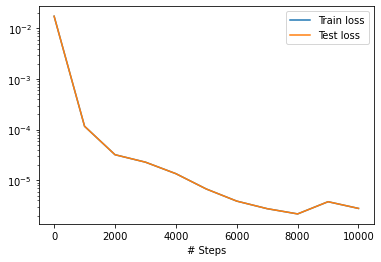

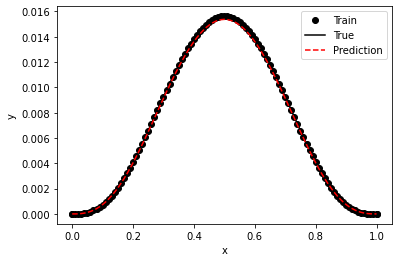

In [3]:
dde.saveplot(losshistory, train_state, issave=False, isplot=True)

1维分数阶对流扩散方程反问题：


代码来源：
https://github.com/lululxvi/deepxde/blob/master/examples/pinn_inverse/fractional_Poisson_1d_inverse.py

In [1]:
"""Backend supported: tensorflow.compat.v1"""
import deepxde as dde
import numpy as np
from deepxde.backend import tf
from scipy.special import gamma

Using backend: tensorflow.compat.v1



Instructions for updating:
non-resource variables are not supported in the long term



In [2]:

alpha0 = 1.8
alpha = tf.Variable(1.5)


def fpde(x, y, int_mat):
    """(D_{0+}^alpha + D_{1-}^alpha) u(x)"""
    if isinstance(int_mat, (list, tuple)) and len(int_mat) == 3:
        int_mat = tf.SparseTensor(*int_mat)
        lhs = tf.sparse_tensor_dense_matmul(int_mat, y)
    else:
        lhs = tf.matmul(int_mat, y)
    lhs /= 2 * tf.cos(alpha * np.pi / 2)
    rhs = gamma(alpha0 + 2) * x
    return lhs - rhs[: tf.size(lhs)]


def func(x):
    return x * (np.abs(1 - x ** 2)) ** (alpha0 / 2)


geom = dde.geometry.Interval(-1, 1)

observe_x = np.linspace(-1, 1, num=20)[:, None]
observe_y = dde.icbc.PointSetBC(observe_x, func(observe_x))

# Static auxiliary points
# data = dde.data.FPDE(
#     geom,
#     fpde,
#     alpha,
#     observe_y,
#     [101],
#     meshtype="static",
#     anchors=observe_x,
#     solution=func,
# )
# Dynamic auxiliary points
data = dde.data.FPDE(
    geom,
    fpde,
    alpha,
    observe_y,
    [100],
    meshtype="dynamic",
    num_domain=20,
    anchors=observe_x,
    solution=func,
    num_test=100,
)

net = dde.nn.FNN([1] + [20] * 4 + [1], "tanh", "Glorot normal")
net.apply_output_transform(lambda x, y: (1 - x ** 2) * y)

model = dde.Model(data, net)

model.compile("adam", lr=1e-3, loss_weights=[1, 100])
variable = dde.callbacks.VariableValue(alpha, period=1000)
losshistory, train_state = model.train(epochs=10000, callbacks=[variable])

G:\Anaconda3\envs\py3.8\lib\site-packages\skopt\sampler\sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+22=22. 
  warnings.warn("The balance properties of Sobol' points require "


Compiling model...
Building feed-forward neural network...
'build' took 0.061283 s



G:\Anaconda3\envs\py3.8\lib\site-packages\keras\legacy_tf_layers\core.py:236: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
G:\Anaconda3\envs\py3.8\lib\site-packages\keras\engine\base_layer_v1.py:1676: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Generating sparse fractional matrix...
Generating sparse fractional matrix...
'compile' took 12.852003 s

Initializing variables...
Training model...

Step      Train loss              Test loss               Test metric
0         [6.44e+00, 6.89e+00]    [6.81e+00, 0.00e+00]    []  
0 [1.50e+00]
1000      [3.75e-02, 5.57e-03]    [5.15e-01, 0.00e+00]    []  
1000 [1.83e+00]
2000      [1.35e-02, 9.50e-04]    [4.87e-01, 0.00e+00]    []  
2000 [1.80e+00]
3000      [2.34e-03, 3.49e-04]    [3.64e-01, 0.00e+00]    []  
3000 [1.79e+00]
4000      [3.92e-04, 3.01e-04]    [2.93e-01, 0.00e+00]    []  
4000 [1.79e+00]
5000      [2.21e-04, 2.09e-04]    [2.66e-01, 0.00e+00]    []  
5000 [1.79e+00]
6000      [1.44e-04, 1.40e-04]    [2.53e-01, 0.00e+00]    []  
6000 [1.79e+00]
7000      [8.72e-05, 1.83e-04]    [2.39e-01, 0.00e+00]    []  
7000 [1.79e+00]
8000      [6.08e-05, 1.33e-04]    [2.25e-01, 0.00e+00]    []  
8000 [1.79e+00]
9000      [8.10e-05, 1.26e-03]    [2.13e-01, 0.00e+00]    []  
9000 [1.

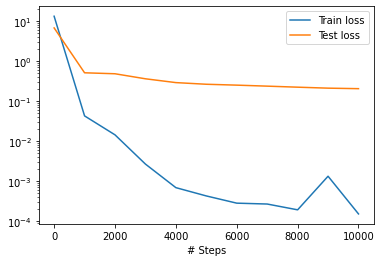

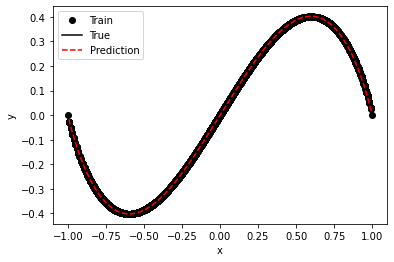

In [3]:
dde.saveplot(losshistory, train_state, issave=False, isplot=True)